<a href="https://colab.research.google.com/github/lapat47/test1/blob/main/Whisper_Large_v3_%E2%80%93_Speech_Recognition_%26_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **what is whisper-large-v3 ???**

####  - model for automatic speech recognition (ASR) and speech translation, proposed in the paper Robust Speech Recognition via Large-Scale Weak Supervision

*   Whisper large-v3 has the same architecture as the previous large and large-v2 models, except for the following minor differences:

1.   The spectrogram input uses 128 Mel frequency bins instead of 80
2.   A new language token for Cantonese



*   The large-v3 model shows improved performance over a wide variety of languages, showing 10% to 20% reduction of errors compared to Whisper large-v2


# Implimentation


1.  การสร้างคำบรรยายจากเสียง (Subtitle generation)
2. การแปลการบรรยายสด (Live transcription and translation)
3. การวิเคราะห์ข้อมูลเสียงในธุรกิจ (Voice data analysis)




## whisper-large-v3 Architechture
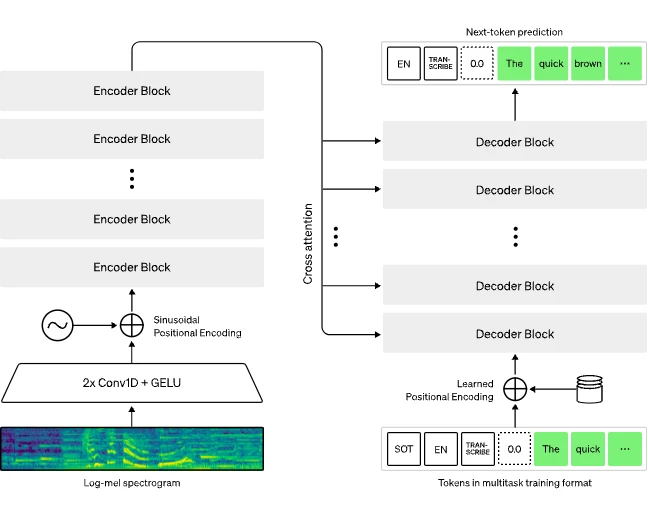

# Install


In [1]:
!pip install --upgrade pip
!pip install --upgrade transformers datasets[audio] accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 121.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB

In [2]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [jiwer]


# Loading LibriSpeech data set
[https://www.openslr.org/12](https://)

## File name

train

1.   84-121123-0002.flac
2.   84-121123-0024.flac
3.   84-121123-0026.flac

test

1.   84-121123.trans.txt








# Call model

In [3]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
from datasets import load_dataset


device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "openai/whisper-large-v3"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)

processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    torch_dtype=torch_dtype,
    device=device,
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
result1 = pipe("/content/84-121123-0002.flac")
result2 = pipe("/content/84-121123-0024.flac")
result3 = pipe("/content/84-121123-0026.flac")

print(result1["text"])
print(result2["text"])
print(result3["text"])

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


 at this moment the whole soul of the old man seemed centered in his eyes which became bloodshot the veins of the throat swelled his cheeks and temples became purple as though he was struck with epilepsy nothing was wanting to complete this but the utterance of a cry
 the district doctor approached with the indifference of a man accustomed to spend half his time amongst the dead he then lifted the sheet which was placed over the face and just unclosed the lips
 daverney said villefort be so kind i beseech you as to accompany this gentleman here is the key of the door so that you can go in and out as you please you will bring the priest with you and will oblige me by introducing him into my child's room do you wish to see him


#Parameter tuning

1.max_new_tokens:
-   Specifies the maximum number of tokens the model can generate in a single decoding pass. In this instance, the value is set to 445 tokens.

2.num_beams:
- Indicates the number of beams to consider during text generation. Setting this parameter to 1 implies the utilization of greedy decoding.

3.condition_on_prev_tokens:
- When set to True, this parameter dictates that the model will condition the decoding of subsequent tokens on the preceding tokens. This is suitable for coherent, multi-segment text.

4.compression_ratio_threshold:
- Defines the compression ratio threshold, calculated using zlib on the token space. This metric is employed to detect nonsensical or abnormally truncated text.

5.temperature:
- Represents a set of temperature values used for text generation (temperature fallback). The model will attempt various values to enhance the likelihood of obtaining a suitable output. Lower values (e.g., 0.0) promote deterministic text generation, while higher values (e.g., 1.0) encourage more stochastic and diverse output.

6.logprob_threshold:
- Establishes a probability threshold for the decoded text. If the probability falls below this value, the decoded text may be discarded. In this case, the threshold is set to -1.0.

7.no_speech_threshold:
- Specifies the threshold for detecting segments lacking speech. If the confidence in speech detection falls below this value, the model will consider the segment as containing no speech. Here, the threshold is 0.6.

8.return_timestamps:
- When set to True, this parameter instructs the model to return the temporal positions (timestamps) for each decoded text segment."

In [ ]:
generate_kwargs = {
    "max_new_tokens": 445,
    "num_beams": 1,
    "condition_on_prev_tokens": False,
    "compression_ratio_threshold": 1.35,
    "temperature": (0.0, 0.2, 0.4, 0.6, 0.8, 1.0),
    "logprob_threshold": -1.0,
    "no_speech_threshold": 0.6,
    "return_timestamps": True,
}

result_a = pipe("/84-121123-0002.flac", generate_kwargs=generate_kwargs)
print(result_a["text"])

In [ ]:
result_b = pipe("/84-121123-0002.flac", generate_kwargs={"language": "english"})
print(result_b["text"])

#####Translate to ENG language

In [ ]:
result_c = pipe("/84-121123-0002.flac", generate_kwargs={"task": "translate"})
print(result_c["text"])

##### Text timestamps

In [ ]:
result_d = pipe("/84-121123-0002.flac", return_timestamps=True)
print(result["chunks"])

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


[{'timestamp': (0.0, 13.68), 'text': ' at this moment the whole soul of the old man seemed centered in his eyes which became bloodshot the veins of the throat swelled his cheeks and temples became purple as though he was struck with epilepsy nothing was wanting to complete this but the utterance of a cry'}]


##### Word timestamps

In [ ]:
result = pipe("/84-121123-0002.flac", return_timestamps="word")
print(result["chunks"])

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
WhisperModel is using WhisperSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `layer_head_mask` not None. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


# Evalute from :





1. WER (Word Error Rate)


2. CER (Character Error Rate)



In [ ]:
import pandas as pd
from transformers import pipeline
import jiwer

audio_files = ["/content/84-121123-0002.flac", "/content/84-121123-0024.flac", "/content/84-121123-0026.flac"]

reference_texts = [
    "AT THIS MOMENT THE WHOLE SOUL OF THE OLD MAN SEEMED CENTRED IN HIS EYES WHICH BECAME BLOODSHOT THE VEINS OF THE THROAT SWELLED HIS CHEEKS AND TEMPLES BECAME PURPLE AS THOUGH HE WAS STRUCK WITH EPILEPSY NOTHING WAS WANTING TO COMPLETE THIS BUT THE UTTERANCE OF A CRY",  # คำถอดจริงของไฟล์ที่ 1
    "THE DISTRICT DOCTOR APPROACHED WITH THE INDIFFERENCE OF A MAN ACCUSTOMED TO SPEND HALF HIS TIME AMONGST THE DEAD HE THEN LIFTED THE SHEET WHICH WAS PLACED OVER THE FACE AND JUST UNCLOSED THE LIPS",                      # คำถอดจริงของไฟล์ที่ 2
    "D'AVRIGNY SAID VILLEFORT BE SO KIND I BESEECH YOU AS TO ACCOMPANY THIS GENTLEMAN HERE IS THE KEY OF THE DOOR SO THAT YOU CAN GO IN AND OUT AS YOU PLEASE YOU WILL BRING THE PRIEST WITH YOU AND WILL OBLIGE ME BY INTRODUCING HIM INTO MY CHILD'S ROOM DO YOU WISH TO SEE HIM"       # คำถอดจริงของไฟล์ที่ 3
]

results = []

for audio_file, reference_text in zip(audio_files, reference_texts):

    result = pipe(audio_file)
    predicted_text = result["text"]

    # Calculate WER and CER.
    wer = jiwer.wer(reference_text, predicted_text)
    cer = jiwer.cer(reference_text, predicted_text)

    # Store data in dictionary format.
    results.append({
        "Audio File": audio_file,
        "Transcript": predicted_text,
        "Reference": reference_text,
        "WER": round(wer, 2),
        "CER": round(cer, 2)
    })

df = pd.DataFrame(results)
df

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_featu

,Audio File,Transcript,Reference,WER,CER
0,/content/84-121123-0002.flac,at this moment the whole soul of the old man ...,AT THIS MOMENT THE WHOLE SOUL OF THE OLD MAN S...,1.0,0.82
1,/content/84-121123-0024.flac,the district doctor approached with the indif...,THE DISTRICT DOCTOR APPROACHED WITH THE INDIFF...,1.0,0.83
2,/content/84-121123-0026.flac,daverney said villefort be so kind i beseech ...,D'AVRIGNY SAID VILLEFORT BE SO KIND I BESEECH ...,1.0,0.79


#REF

*   [https://huggingface.co/openai/whisper-large-v3#model-details](https://)

